In [ ]:
#

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [56]:
FILEPATH = "datasets/maternal-mortality-rate-data.csv"

In [57]:
data = pd.read_csv(FILEPATH)

In [58]:
data.head()

,year,death_rate
0,1990,556
1,1991,538
2,1992,521
3,1993,504
4,1994,488


In [59]:
data.columns

Index(['year', 'death_rate'], dtype='object')

In [60]:
data.isnull().sum().sum()

0

In [61]:
data_set = data.set_index("year")

<AxesSubplot:xlabel='year'>

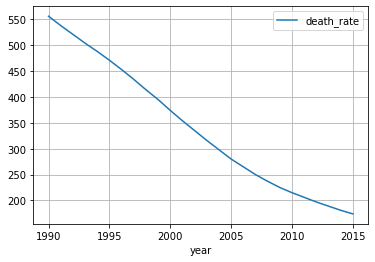

In [62]:
data_set.plot(grid = True)

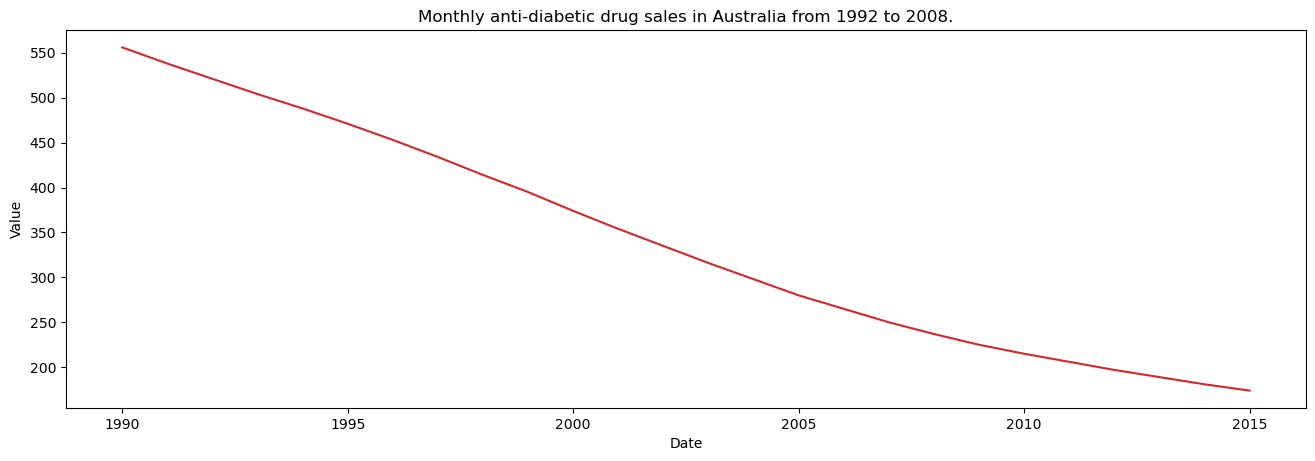

In [63]:
def plot_df(data, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data, x=data["year"], y=data["death_rate"], title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')    

In [64]:
# data['year'] = pd.to_datetime(data['year'])
data.head()

,year,death_rate
0,1990,556
1,1991,538
2,1992,521
3,1993,504
4,1994,488


In [65]:
data.shape

(26, 2)

In [66]:
# create 12 month moving average
data['MA12'] = data['death_rate'].rolling(12).mean()

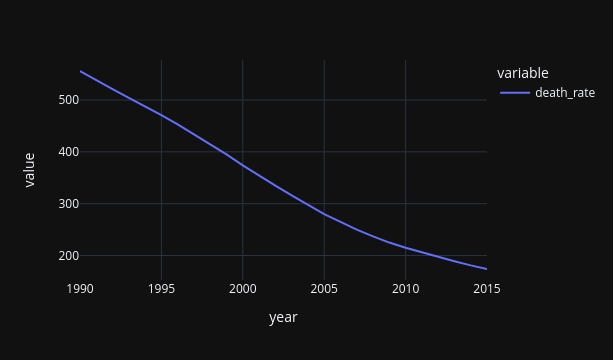

In [71]:
# plot the data and MA
import plotly.express as px
fig = px.line(data, x="year", y=["death_rate"], template = 'plotly_dark')
fig.show()

In [68]:
data['Year'] = data["year"]


In [69]:
data['Series'] = np.arange(1,len(data)+1)

In [114]:
data.head()

,year,death_rate
0,1990,556
1,1991,538
2,1992,521
3,1993,504
4,1994,488


In [113]:
data.drop(["MA12", "Year", "Series"], axis = 1, inplace = True)

In [115]:
train, test = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)

In [116]:
train.shape

(20, 2)

In [117]:
test.shape

(6, 2)

In [118]:
# import the regression module
from pycaret.regression import predict_model, setup, compare_models, finalize_model

In [ ]:
# initialize setup
s = setup(data = train, test_data = test, target = 'death_rate', fold_strategy = 'timeseries', numeric_features = ['year'], fold = 3, transform_target = True, session_id = 123)

In [121]:
best = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,5.8594,65.1482,7.9786,0.9736,0.0305,0.0213,0.0433
br,Bayesian Ridge,19.4782,654.9136,25.4110,0.6686,0.1012,0.0713,0.0067
ridge,Ridge Regression,19.5406,650.2753,25.3334,0.6696,0.1009,0.0716,0.3100
lr,Linear Regression,19.5479,649.4749,25.3188,0.6658,0.1014,0.0719,0.5733
lar,Least Angle Regression,19.5479,649.4750,25.3188,0.6658,0.1014,0.0719,0.0067
omp,Orthogonal Matching Pursuit,19.5485,649.5100,25.3196,0.6658,0.1014,0.0719,0.0067
xgboost,Extreme Gradient Boosting,21.3317,556.1607,23.4534,0.7552,0.0794,0.0725,0.1467
gbr,Gradient Boosting Regressor,22.3997,622.8042,24.8829,0.6722,0.0826,0.0770,0.0133
dt,Decision Tree Regressor,22.4000,622.8000,24.8828,0.6723,0.0826,0.0770,0.0067
rf,Random Forest Regressor,22.5083,699.7345,26.3443,0.7072,0.0918,0.0814,0.0567


In [122]:
prediction_holdout = predict_model(best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,3.6703,55.2567,7.4335,0.9960,0.0140,0.0076


In [123]:
final_best = finalize_model(best)

In [ ]:
future_df = pd.DataFrame()



In [109]:
future_dates = pd.date_range(start = '2015', end = '2034')
future_df = pd.DataFrame()
# future_df['Month'] = [i.month for i in future_dates]
future_df['Year'] = [i.year for i in future_dates]    
# future_df['Series'] = np.arange(145,(145+len(future_dates)))
future_df.head()

,Year
0,2015
1,2015
2,2015
3,2015
4,2015


In [111]:
# predictions_future = predict_model(final_best, data=future_df)
# predictions_future.head()